# Trajectory Visualization

I use similar template to visualize trajectories stored in yaml files.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.markers as markers
from matplotlib.lines import Line2D
from mpl_toolkits import mplot3d
import numpy as np
import math
import copy
import yaml
import sys
import colorsys as csys

In [53]:
filenames = ['0112_1000', '0112_1031', '0112_1153', '0112_1305' ,'0112_1328']
filenames1 = ['0329_1042', '0329_1056', '0329_1104', '0329_1112' ,'0329_1118']
filenames2 = ['0329_1129', '0329_1136', '0329_1141', '0329_1153' ,'0329_1159']
color_met ={}
cnt = 0
for name in filenames:
    rgb = csys.hsv_to_rgb(float(cnt)/len(filenames), 1, 0.8)
    color_met[name] = rgb
    cnt+=1
cnt=0
for name in filenames1:
    rgb = csys.hsv_to_rgb(float(cnt)/len(filenames), 1, 0.8)
    color_met[name] = rgb
    cnt+=1
cnt=0
for name in filenames2:
    rgb = csys.hsv_to_rgb(float(cnt)/len(filenames), 1, 0.8)
    color_met[name] = rgb
    cnt+=1

patch_1 = Line2D([0], [0], marker='.', color='w', label='SLAM T1', markerfacecolor=color_met['0329_1042'], markersize=35)
patch_2 = Line2D([0], [0], marker='.', color='w', label='SLAM T2', markerfacecolor=color_met['0329_1056'], markersize=35)
patch_3 = Line2D([0], [0], marker='.', color='w', label='SLAM T3', markerfacecolor=color_met['0329_1104'], markersize=35)
patch_4 = Line2D([0], [0], marker='.', color='w', label='SLAM T4', markerfacecolor=color_met['0329_1112'], markersize=35)
patch_5 = Line2D([0], [0], marker='.', color='w', label='SLAM T5', markerfacecolor=color_met['0329_1118'], markersize=35)
patches = [patch_1, patch_2, patch_3, patch_4, patch_5]

def ax_init(ax):
    ax.set_facecolor((0.0, 0.0, 0.0))
    ax.axis('equal')
    ax.grid(True)
    # ax.set_aspect('auto')
    ax.set_xbound(lower=-2, upper=65)
    ax.set_ybound(lower=-5, upper=10)
    ax.tick_params(axis='both',labelsize=45)
    ax.legend(handles=patches, fontsize=50)
    ax.set_xlabel('Robot Position X (meter)', fontsize=50)
    ax.set_ylabel('Robot Position Y (meter)', fontsize=50)
    return ax

('New file: ', 'data/0112_1000.yaml')
('No such file', '0112_1000')
('New file: ', 'data/0112_1031.yaml')
('No such file', '0112_1031')
('New file: ', 'data/0112_1153.yaml')
('No such file', '0112_1153')
('New file: ', 'data/0112_1305.yaml')
('No such file', '0112_1305')
('New file: ', 'data/0112_1328.yaml')
('No such file', '0112_1328')


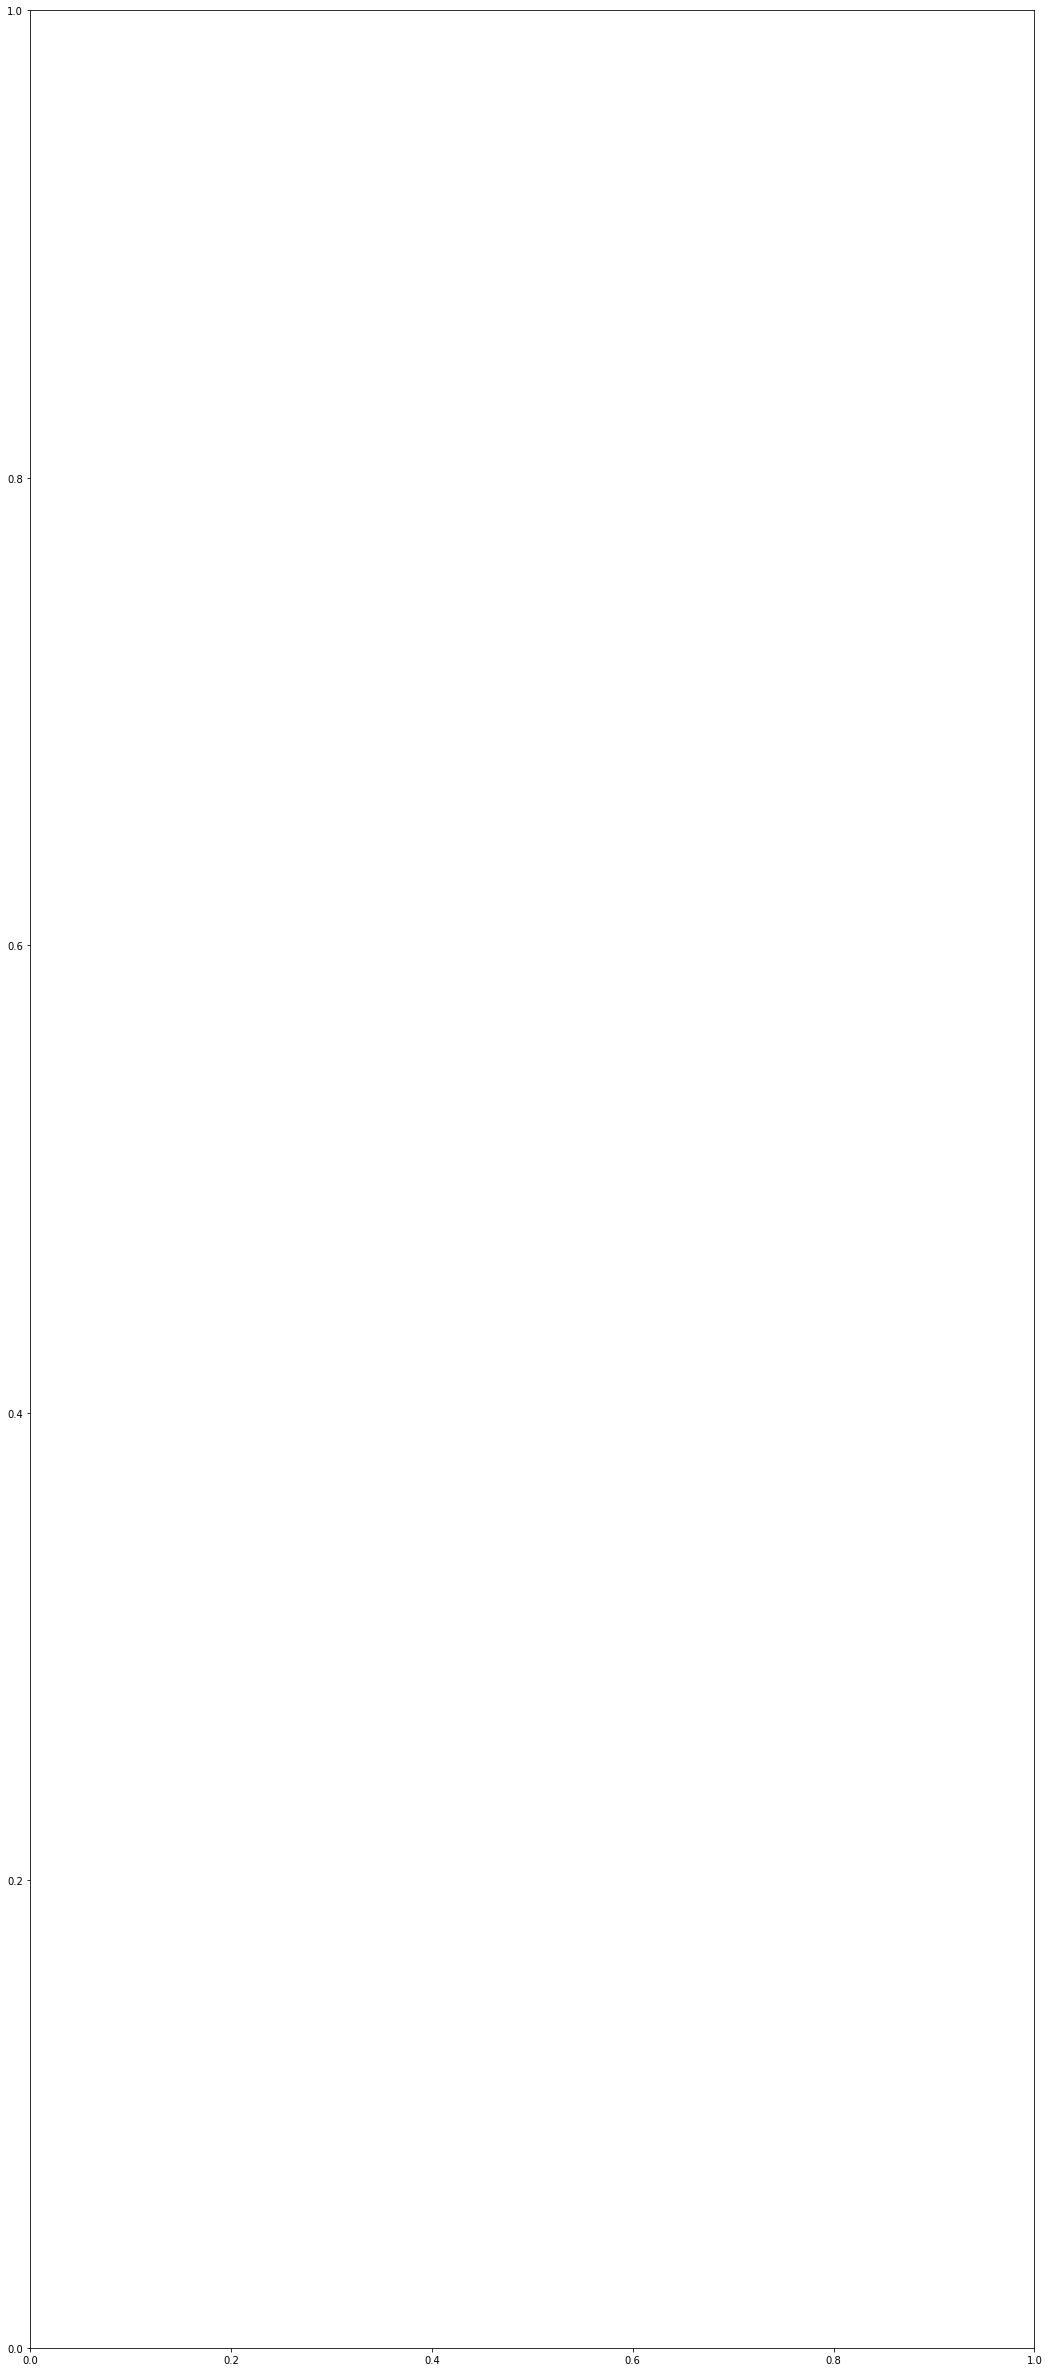

In [9]:
f, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(18,43))
for filename in filenames:

    filename_p = 'data/' + filename + '.yaml'
            
    print('New file: ',filename_p)
            
    try:
        with open(filename_p) as dis_file:
            all_data = yaml.load(dis_file)
            pos_list = all_data['data']
            timestamp = all_data['start_time']

            pos_list['x'] = np.array(pos_list['x'], dtype=np.float64)
            pos_list['y'] = np.array(pos_list['y'], dtype=np.float64)
            pos_list['timestamp'] = np.array(pos_list['timestamp'], dtype=np.float64)
            del all_data
    except IOError:
        print("No such file", filename)
        continue
            
    axes.scatter(-1*pos_list['y'], pos_list['x'], s=10, c=color_met[filename])
    axes = ax_init(axes)
            
    del pos_list
    del timestamp
    
    print "=================================================="

plt.show()

('New file: ', 'data/0329_1042.yaml')
('New file: ', 'data/0329_1056.yaml')
('New file: ', 'data/0329_1104.yaml')
('New file: ', 'data/0329_1112.yaml')
('New file: ', 'data/0329_1118.yaml')


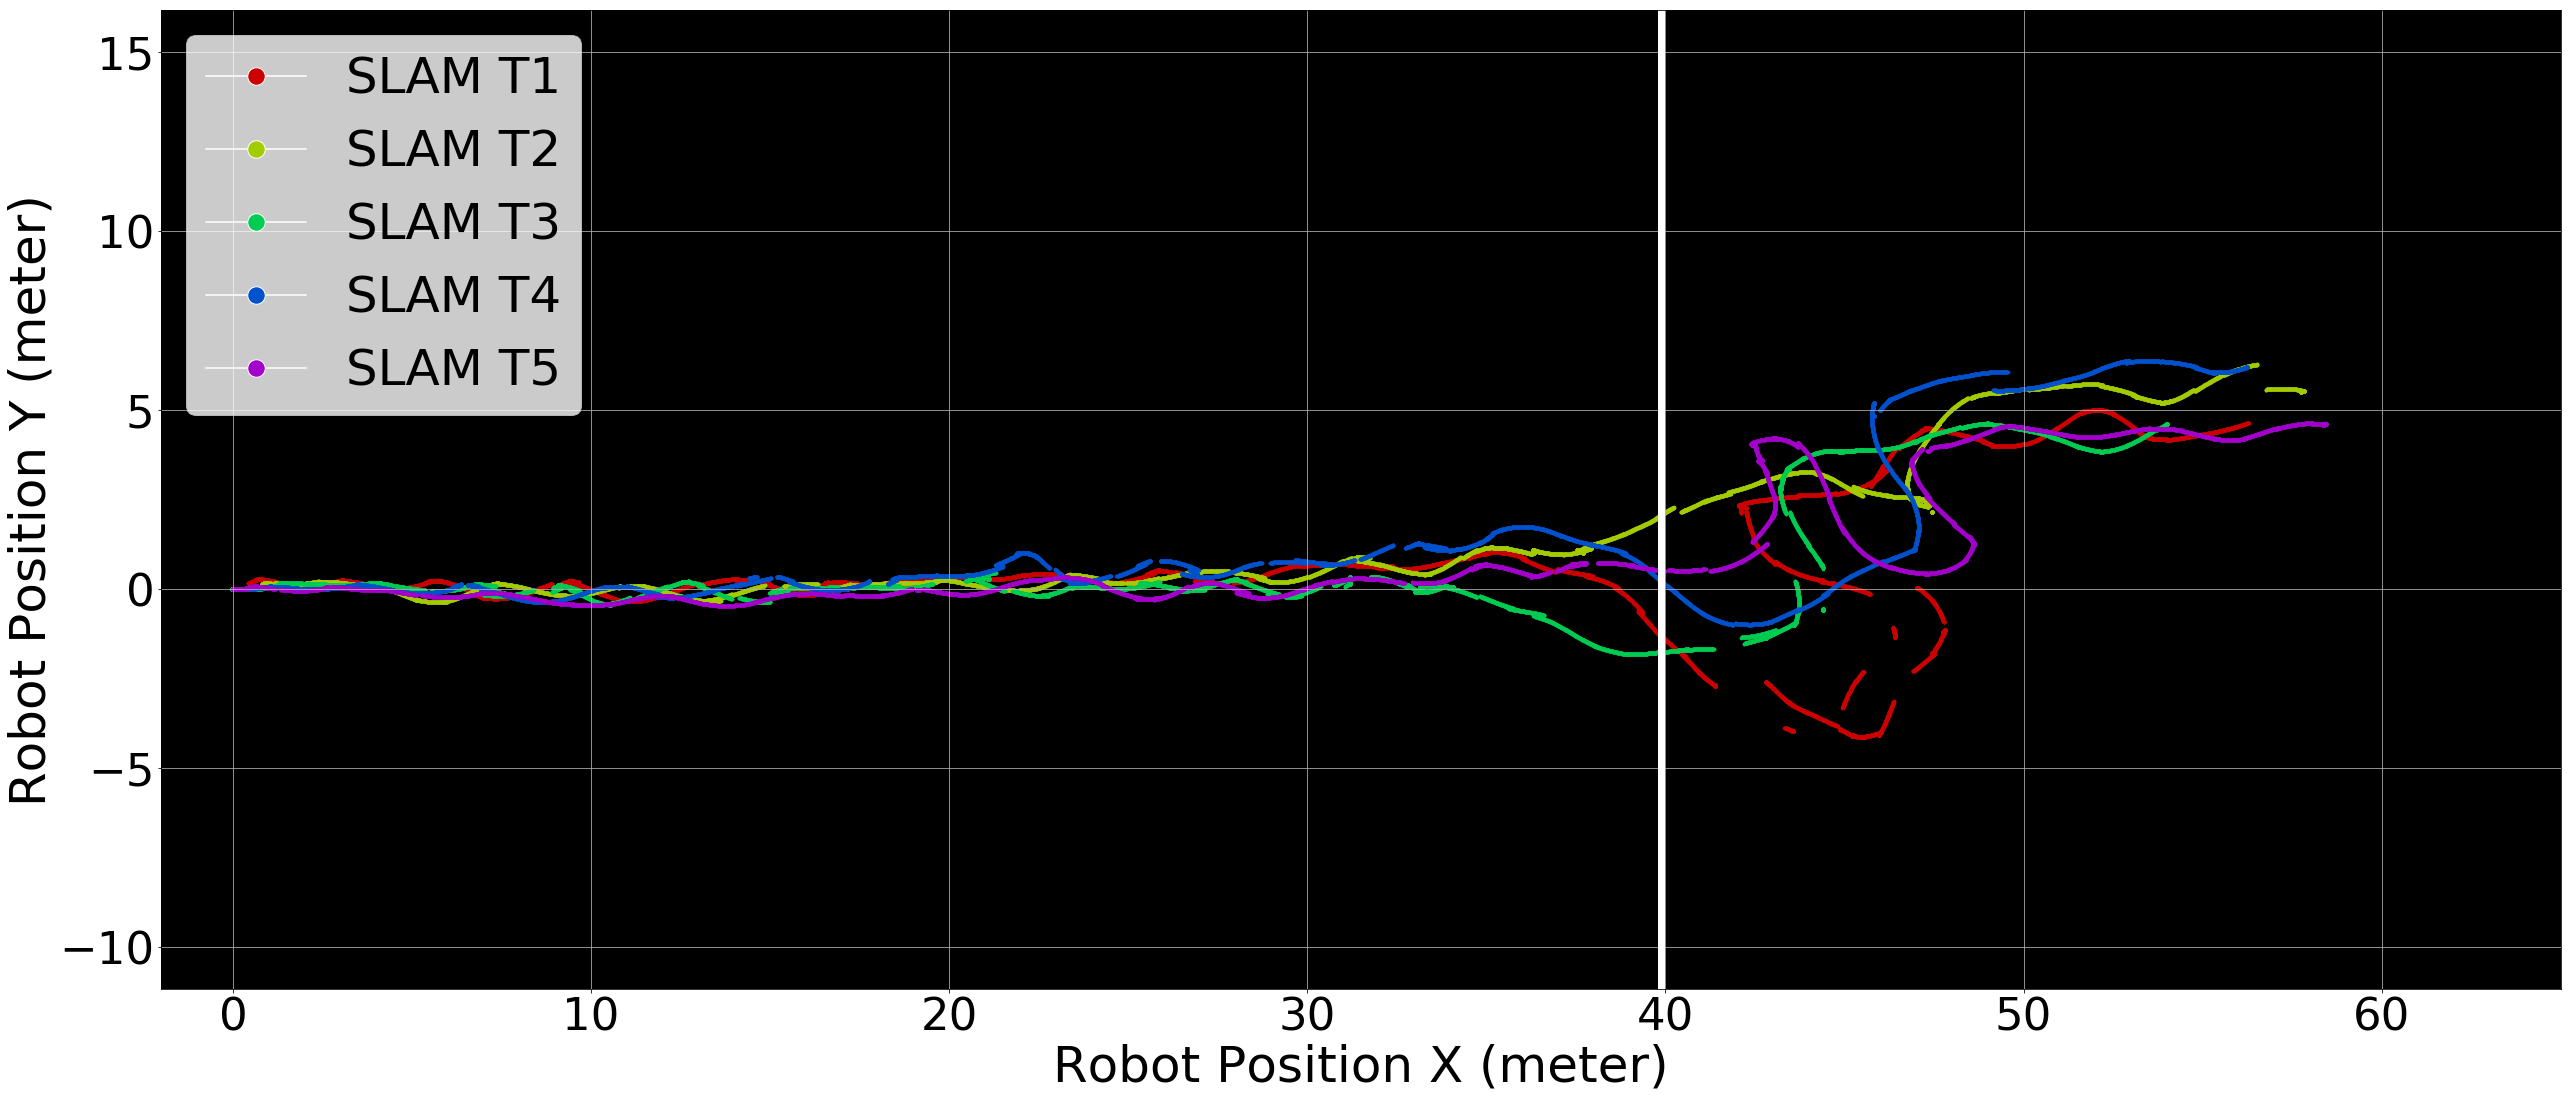

56.53459418422


In [54]:
f, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(43,18))
final_x = []
for filename in filenames1:

    filename_p = 'data/' + filename + '.yaml'
            
    print('New file: ',filename_p)
            
    try:
        with open(filename_p) as dis_file:
            all_data = yaml.load(dis_file)
            pos_list = all_data['data']
            timestamp = all_data['start_time']

            pos_list['x'] = np.array(pos_list['x'], dtype=np.float64)
            pos_list['y'] = np.array(pos_list['y'], dtype=np.float64)
            pos_list['timestamp'] = np.array(pos_list['timestamp'], dtype=np.float64)
            del all_data
    except IOError:
        print("No such file", filename)
        continue
            
    axes.scatter(pos_list['x'], pos_list['y'], s=7, c=color_met[filename])
    axes = ax_init(axes)
    
    final_x = np.append(final_x, pos_list['x'][-1])
            
    del pos_list
    del timestamp
    
    print "=================================================="

axes.axvline([39.89], linewidth=7, color=[1, 1, 1])
plt.show()

print(np.mean(final_x))

('New file: ', 'data/0329_1129.yaml')
('New file: ', 'data/0329_1136.yaml')
('New file: ', 'data/0329_1141.yaml')
('New file: ', 'data/0329_1153.yaml')
('New file: ', 'data/0329_1159.yaml')


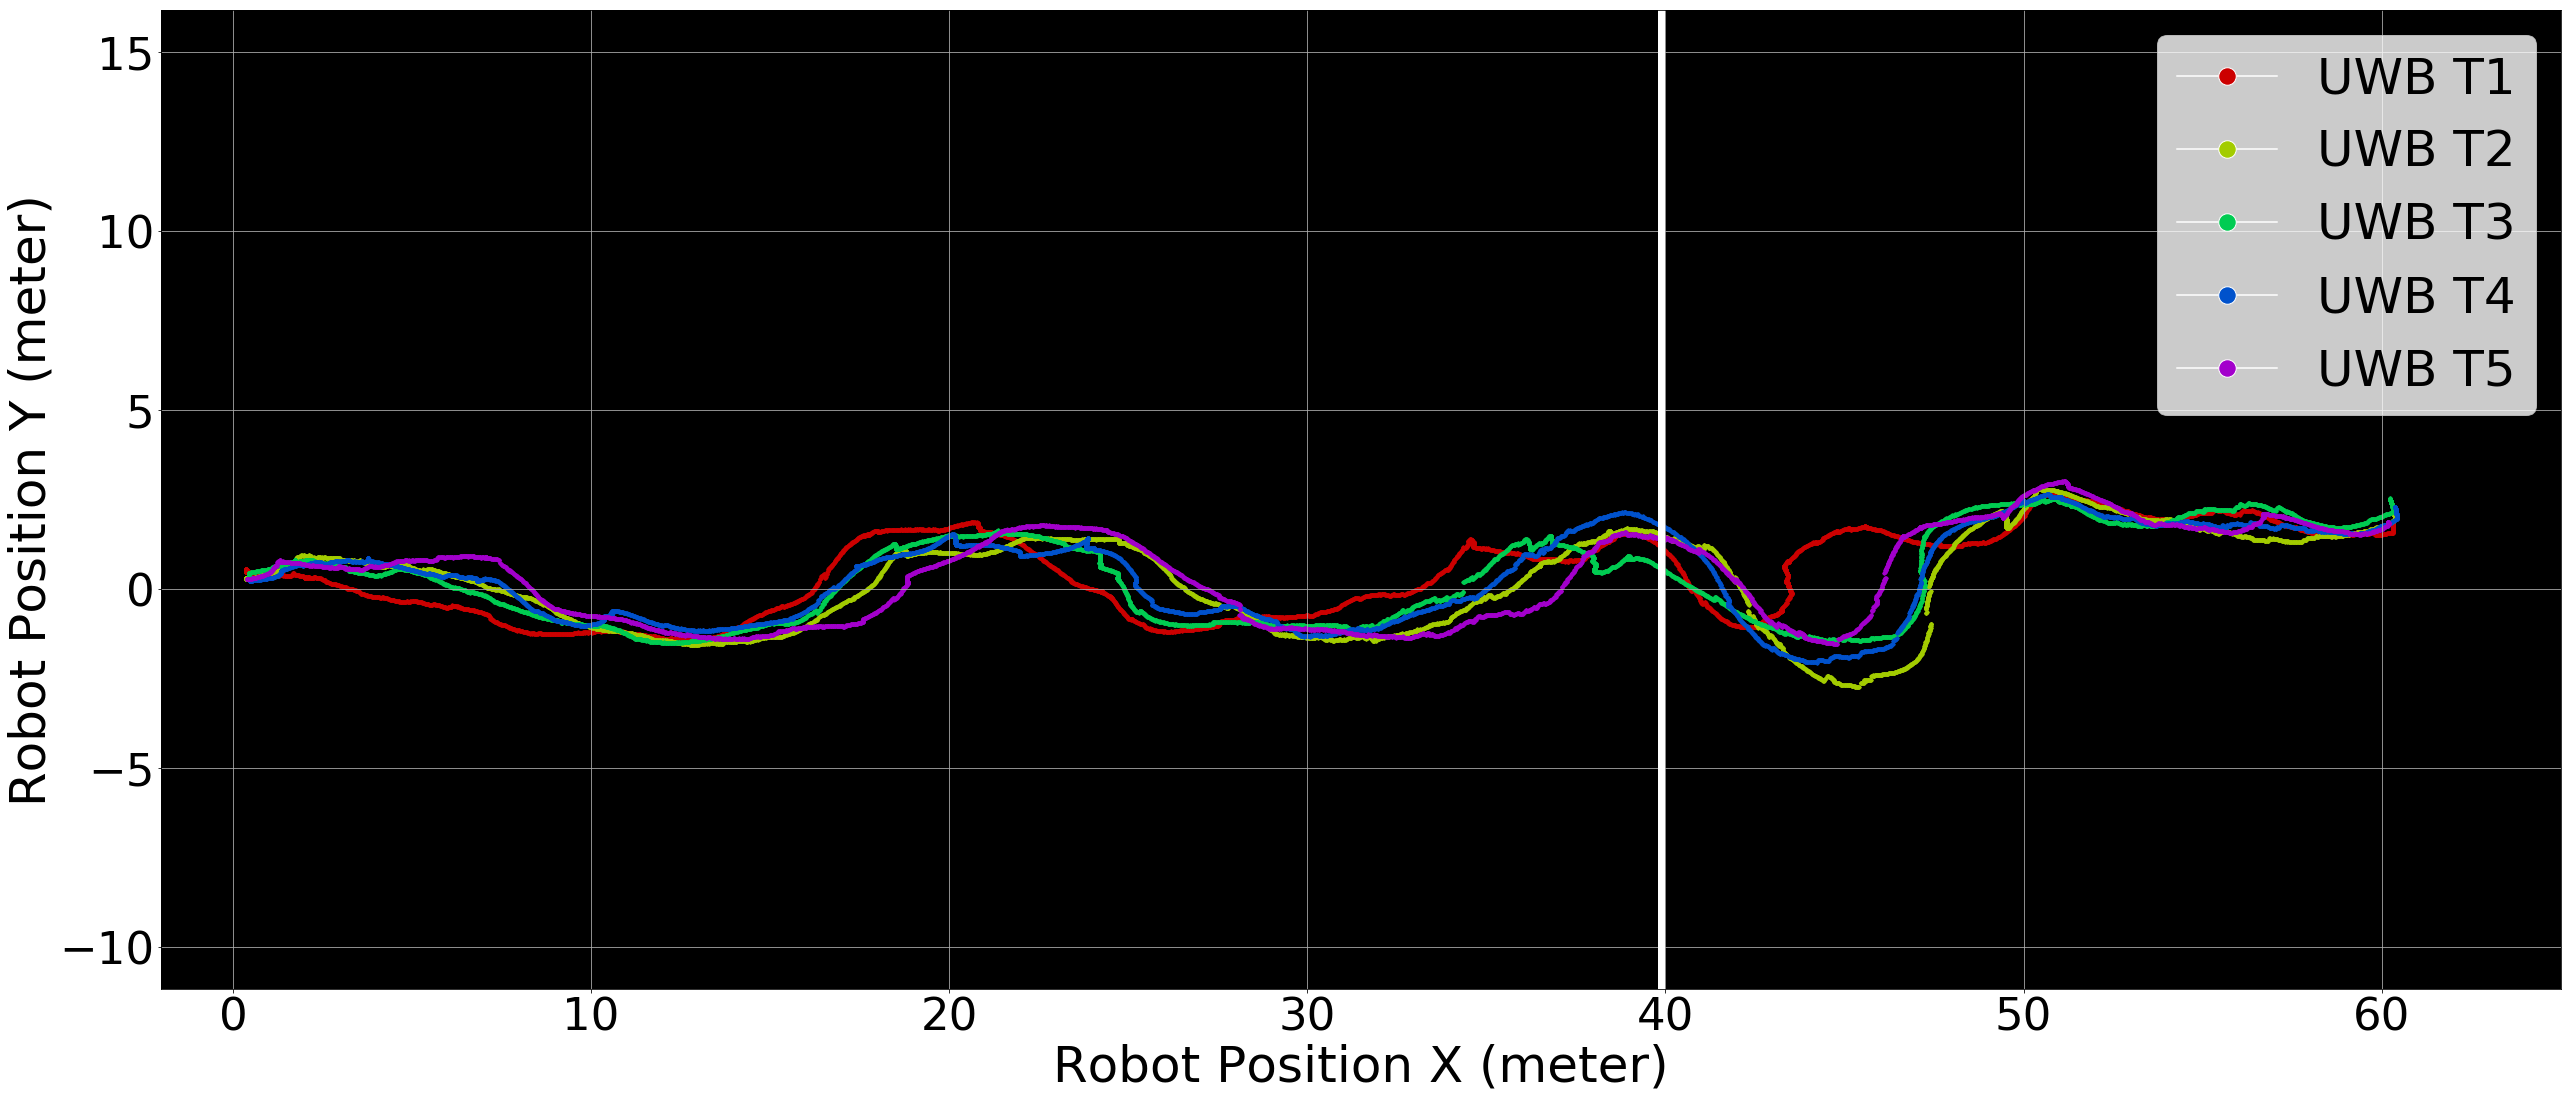

60.28242158887999


In [51]:
f, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(43,18))
final_x = []
for filename in filenames2:

    filename_p = 'data/' + filename + '.yaml'
            
    print('New file: ',filename_p)
            
    try:
        with open(filename_p) as dis_file:
            all_data = yaml.load(dis_file)
            pos_list = all_data['data']
            timestamp = all_data['start_time']

            pos_list['x'] = np.array(pos_list['x'], dtype=np.float64)
            pos_list['y'] = np.array(pos_list['y'], dtype=np.float64)
            pos_list['timestamp'] = np.array(pos_list['timestamp'], dtype=np.float64)
            del all_data
    except IOError:
        print("No such file", filename)
        continue
            
    axes.scatter(pos_list['x'], pos_list['y'], s=7, c=color_met[filename])
    axes = ax_init(axes)
            
    final_x = np.append(final_x, pos_list['x'][-1])
        
    del pos_list
    del timestamp
    print "=================================================="

axes.axvline([39.89], linewidth=7, color=[1, 1, 1])
plt.show()

print(np.mean(final_x))